In [11]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier


In [12]:
# Cell 2: Load & Explore Dataset
df = pd.read_csv("Alphabets_data.csv")

print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print("First 5 rows:\n", df.head())
print("\nClass distribution:\n", df['letter'].value_counts())
print("\nMissing values:\n", df.isnull().sum())
df.info()


Dataset shape: (20000, 17)
Columns: Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')
First 5 rows:
   letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1 

In [13]:
# Cell 3: Preprocessing
df.dropna(inplace=True)

X = df.drop(columns=['letter'])
y = df['letter']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [14]:
# Cell 4: Train MLPClassifier (Basic Model)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                    solver='adam', alpha=0.0001, batch_size=32,
                    learning_rate='adaptive', early_stopping=True,
                    max_iter=100, random_state=42)

mlp.fit(X_train, y_train)


MLPClassifier(batch_size=32, early_stopping=True, hidden_layer_sizes=(64, 32),
              learning_rate='adaptive', max_iter=100, random_state=42)

Accuracy: 0.9453

Classification Report:
               precision    recall  f1-score   support

           A       0.96      0.97      0.97       158
           B       0.88      0.90      0.89       153
           C       0.91      0.98      0.94       147
           D       0.93      0.96      0.94       161
           E       0.93      0.92      0.92       154
           F       0.91      0.95      0.93       155
           G       0.95      0.88      0.91       155
           H       0.93      0.91      0.92       147
           I       0.97      0.89      0.93       151
           J       0.92      0.95      0.93       149
           K       0.96      0.93      0.95       148
           L       0.92      0.97      0.94       152
           M       0.99      0.95      0.97       158
           N       0.97      0.92      0.94       157
           O       0.97      0.95      0.96       150
           P       0.96      0.95      0.95       161
           Q       0.97      0.98      

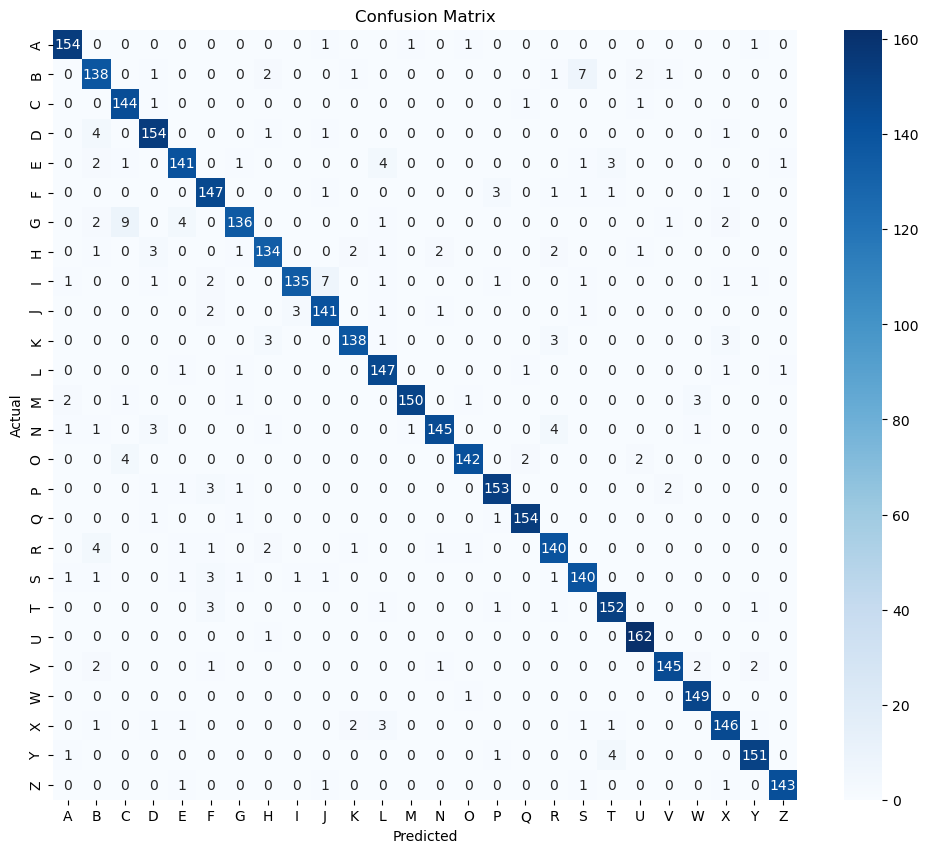

In [15]:
# Cell 5: Evaluate Model
y_pred = mlp.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


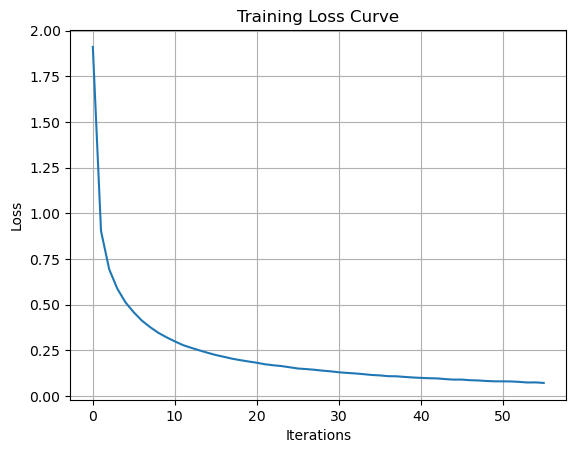

In [16]:
# Cell 6: Plot Loss Curve
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()


In [ ]:
# Cell 7: GridSearchCV for Hyperparameter Tuning
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'batch_size': [16, 32],
    'max_iter': [100]
}

grid_search = GridSearchCV(MLPClassifier(early_stopping=True, random_state=42),
                           param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [ ]:
# Cell 7: GridSearchCV for Hyperparameter Tuning
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'batch_size': [16, 32],
    'max_iter': [100]
}

grid_search = GridSearchCV(MLPClassifier(early_stopping=True, random_state=42),
                           param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
